# Visualising the Tagged Images

In [1]:
import os, re
import itertools as it
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img

import seaborn as sns
sns.set()
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

## Reading in the data

In [2]:
labels_df = pd.read_csv('train_data/train_v3.csv')

labels_df.head()

,image_name,image_path,tags,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,train_data/train_0.jpg,haze primary,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,train_data/train_1.jpg,agriculture clear primary water,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,train_data/train_2.jpg,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,train_data/train_3.jpg,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,train_data/train_4.jpg,agriculture clear habitation primary road,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


# Plotting the Tagged Images

In [3]:
label_list = sorted(set(it.chain.from_iterable(
                 labels_df.tags.apply(lambda s: s.split(" ")))))

In [4]:
print(", ".join(label_list))

agriculture, artisinal_mine, bare_ground, blooming, blow_down, clear, cloudy, conventional_mine, cultivation, habitation, haze, partly_cloudy, primary, road, selective_logging, slash_burn, water


In [22]:
def label_grid(labels1, labels2=None):
    '''Assemble a grid of images with tags from labels1 and labels2'''
    
    if labels2 == None:
        labels2 = labels1    # use matching labels
        
    for label1, label2 in it.product(labels1, labels2):
        mask = np.logical_and(labels_df[label1] == 1,
                              labels_df[label2] == 1)
        
        if np.any(mask) == False:
            # There are no examples, yield blank image
            yield np.zeros_like(next_image)
            
        else:
            # There is an example, extract and yield it
            next_path = labels_df.ix[mask, 'image_path']\
                                 .sample(1)\
                                 .values[0]
            next_image = img.imread(next_path)
            yield next_image

In [157]:
def plot_grid(images, width, height=None):
    '''Plot a grid of images, `width` across and `height` high'''
    
    if height is None:
        height = width    # use matching width + height
        
    fig, ax = plt.subplots(width, height, sharex=True, sharey=True)
    for i, j in it.product(range(width), range(height)):
        image = images[width * i + j]
        ax[i,j].imshow(image)
        ax[i,j].axis('off')

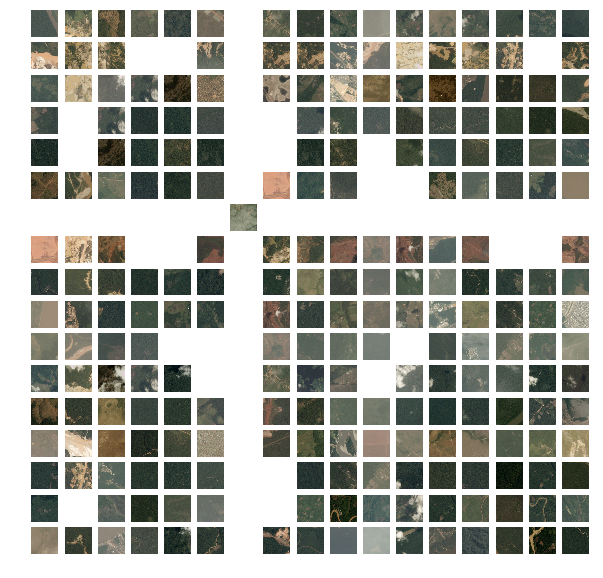

In [158]:
plot_grid(list(label_grid(label_list)), len(label_list))
plt.savefig("image_grid.png")

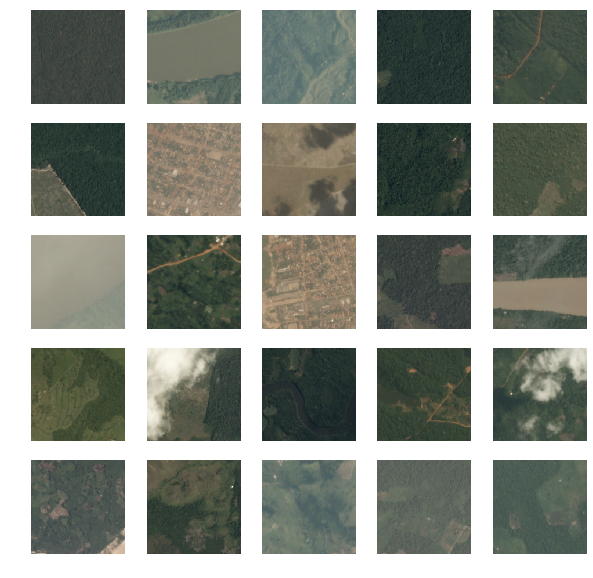

In [27]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
plot_grid(list(label_grid(land_labels)), len(land_labels))

## Colour Channels

In [103]:
sample_size = 100
image_sample = map(lambda f: img.imread(f), 
                   labels_df.image_path.sample(sample_size))
image_sample = np.concatenate(list(image_sample))

In [ ]:
plt.hist(image_sample.reshape(25600*256, 4), color='rgbm')
plt.legend()
print()   # suppress output

This means that the near Infrared channel has been removed in the .jpg format.

Lets reproduce the plot without the infrared channel.

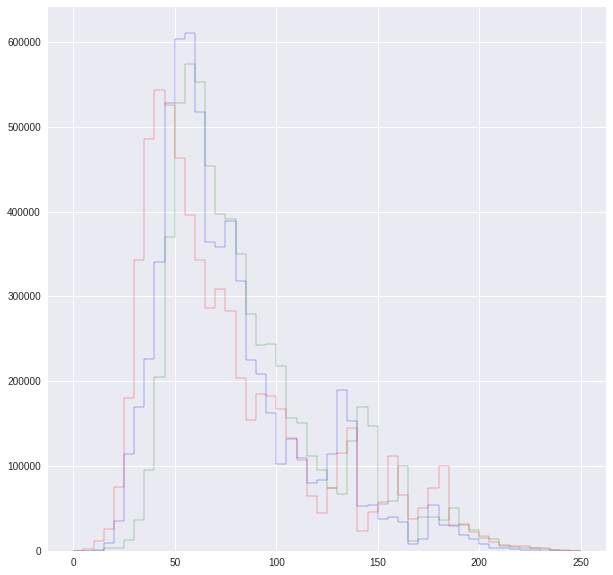

In [106]:
plt.hist(image_sample.reshape(256*256*sample_size, 4)[:,:3], 
         color='rgb', histtype='step', bins=50)
print()   # suppress output

The RGB channels are clearly pretty correlated, this is probably a sign that the images are fairly similar throughout? Or something.

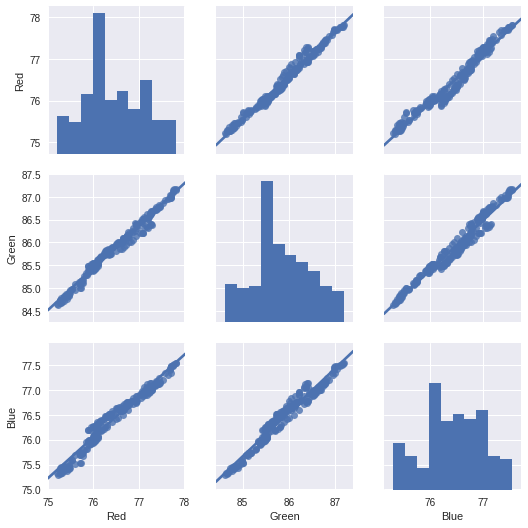

In [149]:
sns.pairplot(
    pd.DataFrame(
        np.mean(image_sample[:,:,:3], axis=0), 
        columns=["Red", "Green", "Blue"]),
    kind='reg'
    )